# SRC-surrogates example

<font size="4"> 
We go through a simple example (AR(1)-process) to show how SRC-surrogates can be generated. We showcase that the number of samples/unit interval is conserved.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
# import the module
import SRC_surro as SRC

<font size="4"> 
We generate an unevenly spaced time axis with exponentially distributed sampling intervals:

Text(0.5, 0, 'sampling interval')

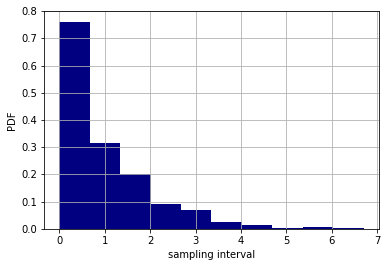

In [2]:
T = 1000
lambd = 1
a_t = np.cumsum(np.random.exponential(lambd, T))

fig = plt.figure()
plt.grid()
plt.hist(np.diff(a_t), color='navy', density=True)
plt.ylabel('PDF'); plt.xlabel('sampling interval')

<font size="4"> 
Next, an AR(1)-time series is generated on this time axis:

Text(0.5, 0, 'time')

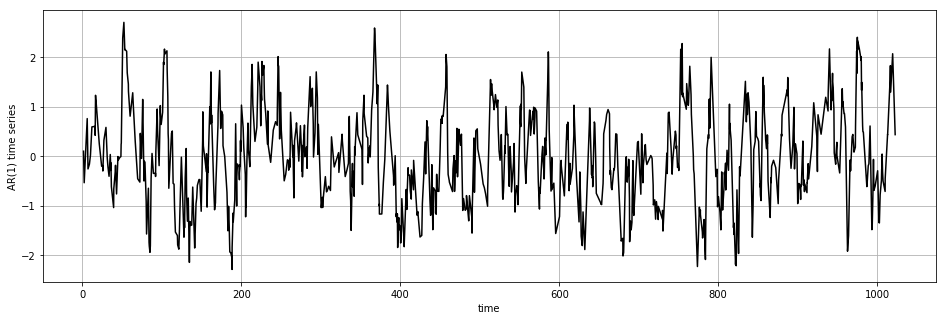

In [3]:
a_ts = SRC.AR1_irreg(t=a_t, tau=5, sdev=1, mean=0, x0=0.1)

fig = plt.figure(figsize=(16, 5))
plt.grid()
plt.plot(a_t, a_ts, color='black')
plt.ylabel('AR(1) time series'); plt.xlabel('time')

<font size="4"> 
We generate 9 SRC-surrogates and check whether the number of sampels/unit interval (segment sizes) are conserved. Also, we compare the histograms of sampling intervals; they do not exactly match but are bootstrap samples from the same underlying distribution.

In [4]:
Nsurr = 9
a_surrt, a_surrts = SRC.SRC_surrogates(t=a_t, ts=a_ts, Nsurr=Nsurr, step=0.15, Nit=1000, alpha0=1, beta=1)

Text(0, 0.5, 'frequency')

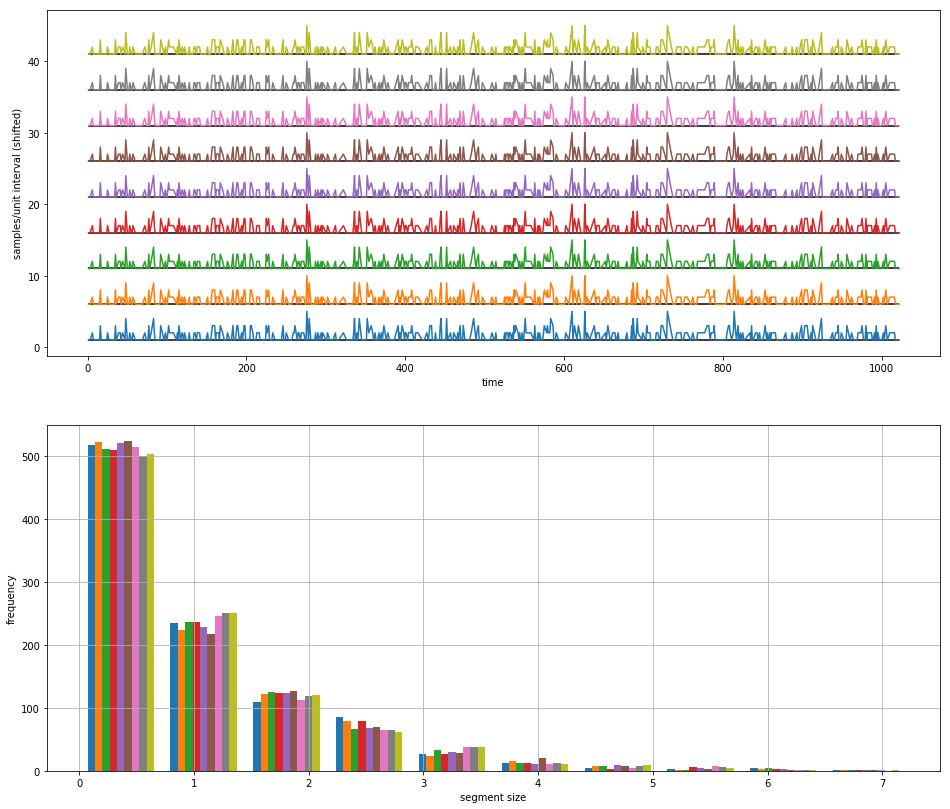

In [52]:
a_int, a_split = SRC.unit_split(a_t)
Nint = a_int.size
a_spi = np.zeros((Nsurr, Nint))
for n in range(Nsurr):
    tmp_split = SRC.unit_split(a_surrt[n])
    a_spi[n,] = np.hstack([tmp_split[1][i].size for i in range(Nint)])


fig, ax = plt.subplots(nrows=2, figsize=(16, 14))
ax[0].plot(a_int, a_spi.T+np.arange(0, 45, 5))
ax[0].set_ylabel('samples/unit interval (shifted)'); ax[0].set_xlabel('time')
ax[0].hlines(1+np.arange(0, 45, 5), 0, a_int[-1], color='black')
ax[1].hist(np.diff(a_surrt, axis=1).T)
ax[1].grid()
ax[1].set_xlabel('segment size'); ax[1].set_ylabel('frequency')

<font size="4"> 
Finally, we compare the surrogates to the original time series.

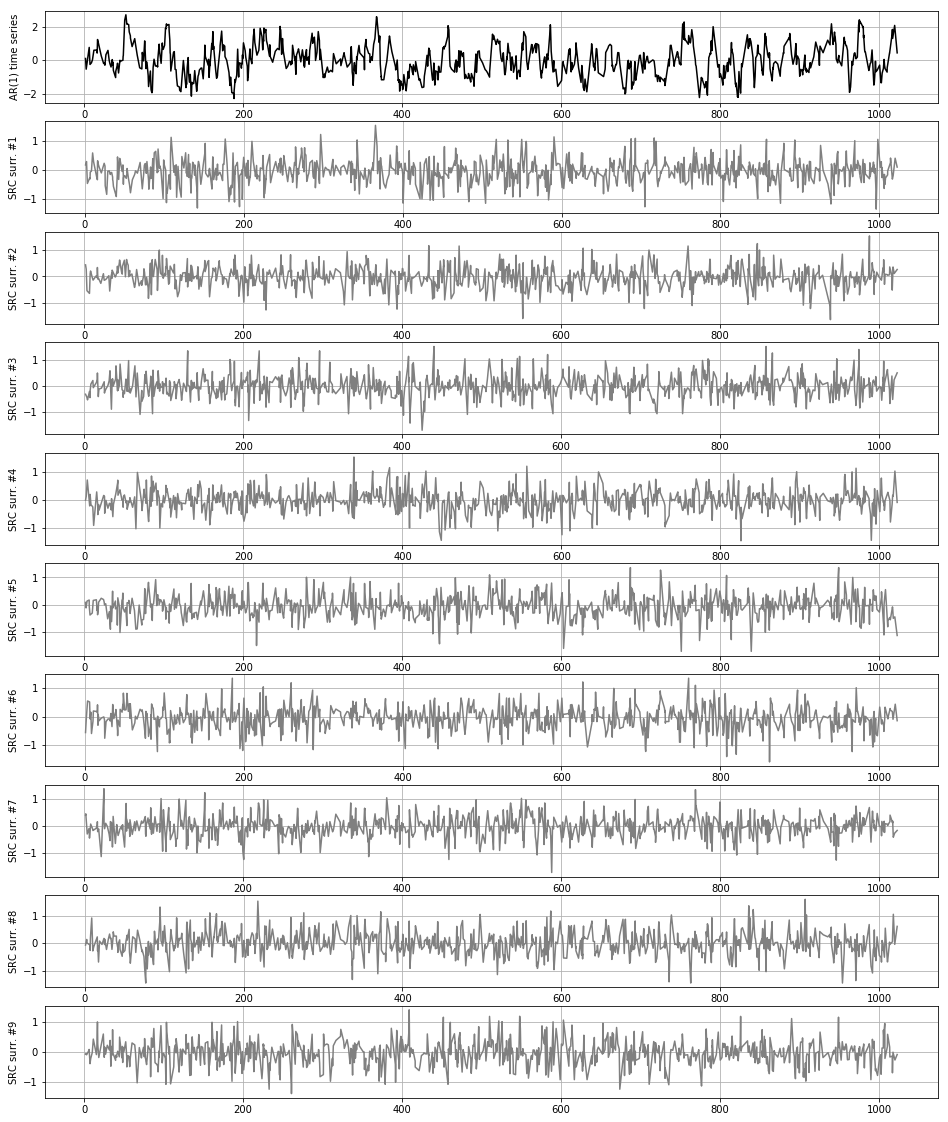

In [11]:
fig, ax = plt.subplots(nrows=Nsurr+1, figsize=(16, 20))
ax[0].grid()
ax[0].plot(a_t, a_ts, color='black')
ax[0].set_ylabel('AR(1) time series'); ax[0].set_xlabel('time')
for i in range(1,10):
    ax[i].grid()
    ax[i].plot(a_surrt[i-1], a_surrts[i-1], color='gray')
    ax[i].set_ylabel('SRC-surr. $\#$' + str(i))